# 0. Install and Import Dependencies

In [ ]:
#!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python matplotlib

In [37]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib
!pip install numpy scipy matplotlib pandas sympy nose Shapely

In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [ ]:
#Download Model on Lniux
!wget -q -O lite-model_movenet_singlepose_lightning_3.tflite https://tfhub.dev/google/lite-model/movenet/singlepose/lightning/3?lite-format=tflite

In [ ]:
#Download Model on Windows
import requests
url= "https://tfhub.dev/google/lite-model/movenet/singlepose/lightning/3?lite-format=tflite"
r= requests.get(url, allow_redirects=True)
open('lite-model_movenet_singlepose_lightning_3.tflite', 'wb').write(r.content)

# 1. Load Model

In [ ]:
interpreter = tf.lite.Interpreter(model_path='lite-model_movenet_singlepose_lightning_3.tflite')
interpreter.allocate_tensors()

# Orignal Code

# 2. Make Detections

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Reshape image
    img = frame.copy()
    img = tf.image.resize_with_pad(np.expand_dims(img, axis=0), 192,192)
    input_image = tf.cast(img, dtype=tf.float32)
    
    # Setup input and output 
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    # Make predictions 
    interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
    interpreter.invoke()
    keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
    
    # Rendering 
    draw_connections(frame, keypoints_with_scores, EDGES, 0.4)
    draw_keypoints(frame, keypoints_with_scores, 0.4)
    
    cv2.imshow('MoveNet Lightning', frame)
    
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

# 3. Draw Keypoints

In [ ]:
def draw_keypoints(frame, keypoints, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    marker_name= ['nose', 'left eye','right eye', 'left ear', 'right ear', 'left shoulder', 'right shoulder', 'left elbow', 'right elbow', 'left wrist','right wrist', 'left hip', 'right hip', 'left knee', 'right knee', 'left ankle', 'right ankle']
    marker_count=0
    
    for kp in shaped:
        ky, kx, kp_conf = kp
        if kp_conf > confidence_threshold:
            cv2.circle(frame, (int(kx), int(ky)), 4, (0,255,0), -1) 
            cv2.putText(frame, marker_name[marker_count], (int(kx), int(ky)), cv2.FONT_HERSHEY_PLAIN, 2, (255,255,255),2,cv2.LINE_AA)
            marker_count=marker_count+1
            
            #cv2.putText(image, text, org, font, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])

# 4. Draw Edges

In [ ]:
EDGES = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}

In [ ]:
def draw_connections(frame, keypoints, edges, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for edge, color in edges.items():
        p1, p2 = edge
        y1, x1, c1 = shaped[p1]
        y2, x2, c2 = shaped[p2]
        
        if (c1 > confidence_threshold) & (c2 > confidence_threshold):      
            cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0,0,255), 2)

# Modified Code by Mohit

# 2. Draw Keypoints

In [ ]:
def draw_keypoints(frame, keypoints, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    marker_name= ['nose', 'left eye','right eye', 'left ear', 'right ear', 'left shoulder', 'right shoulder', 'left elbow', 'right elbow', 'left wrist','right wrist', 'left hip', 'right hip', 'left knee', 'right knee', 'left ankle', 'right ankle']
    marker_count=0
    
    for kp in shaped:
        ky, kx, kp_conf = kp
        if kp_conf > confidence_threshold:
            cv2.circle(frame, (int(kx), int(ky)), 4, (0,255,0), -1) 
            # put text on markers
#             cv2.putText(frame, marker_name[marker_count], (int(kx), int(ky)), cv2.FONT_HERSHEY_PLAIN, 2, (255,255,255),2,cv2.LINE_AA)
            cv2.putText(frame, str(marker_count), (int(kx), int(ky)), cv2.FONT_HERSHEY_PLAIN, 2, (255,255,255),2,cv2.LINE_AA)
            marker_count=marker_count+1
            
            #cv2.putText(image, text, org, font, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])

# 3. Draw Edges

In [ ]:
EDGES = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}

In [ ]:
def draw_connections(frame, keypoints, edges, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for edge, color in edges.items():
        p1, p2 = edge
        y1, x1, c1 = shaped[p1]
        y2, x2, c2 = shaped[p2]
        
        if (c1 > confidence_threshold) & (c2 > confidence_threshold):      
            cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0,0,255), 2)

In [ ]:
# List camera devices

index = 0
arr = []
while True:
    cap = cv2.VideoCapture(index)
    if not cap.read()[0]:
        break
    else:
        arr.append(index)
    cap.release()
    index += 1
print(arr)

# 4. Make Detections - Mohit Version for black screen

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Reshape image
    img = frame.copy()
    
    #width, height = img.size
    #print(width, height)
    
    img = tf.image.resize_with_pad(np.expand_dims(img, axis=0), 192, 192)
    input_image = tf.cast(img, dtype=tf.float32)
    
    # Setup input and output 
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    # Make predictions 
    interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
    interpreter.invoke()
    keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
    
    #Rendering with background image 
    
    #Reading the background image
    image = cv2.imread(r'C:\Users\devops\PoseEstimationProject\background.jpg')
    width = 800
    height = 1100
    dim = (width, height)
    image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    #Create a black image
    img = np.zeros((512,512,3), np.uint8)
    
    draw_connections(image, keypoints_with_scores, EDGES, 0.4)
    draw_keypoints(image, keypoints_with_scores, 0.4)
        
    cv2.imshow('MoveNet Lightning', image)
    
#     # Rendering 
#     draw_connections(frame, keypoints_with_scores, EDGES, 0.4)
#     draw_keypoints(frame, keypoints_with_scores, 0.4)
    
#     cv2.imshow('MoveNet Lightning', frame)
        
    
    
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

# Update image with another sub image

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
import cv2

from numpy import ones,vstack
from numpy.linalg import lstsq
import math

from shapely.geometry import LineString

interpreter = tf.lite.Interpreter(model_path='lite-model_movenet_singlepose_lightning_3.tflite')
interpreter.allocate_tensors()

In [18]:
#function to get line equation from 2 points on the line
def get_squareCorners(x1, y1, x2, y2):
    
    line_length = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    slope, intercept, r_value, p_value, std_err = linregress([x1,x2],[y1,y2])
    
    a = (x1, y1)
    b = (x2, y2)
    ab = LineString([a, b])
    left = ab.parallel_offset(line_length / 2, 'left')
    right = ab.parallel_offset(line_length / 2, 'right')
    
    c = left.boundary[1]
    d = right.boundary[0]
    e = left.boundary[0]
    f = right.boundary[1]
    
    print(slope,intercept)
    return (c, d, e, f)        

0.0 0.0
points are:
[[ 6.  1.]
 [ 6. -1.]
 [ 4.  1.]
 [ 4. -1.]]


C:\Users\devops\AppData\Local\Temp/ipykernel_6896/2126112649.py:13: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  c = left.boundary[1]
C:\Users\devops\AppData\Local\Temp/ipykernel_6896/2126112649.py:14: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  d = right.boundary[0]
C:\Users\devops\AppData\Local\Temp/ipykernel_6896/2126112649.py:15: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  e = left.boundary[0]
C:\Users\devops\AppData\Local\Temp/ipykernel_6896/2126112649.py:16: ShapelyDeprecationWarning: __getitem__ for multi-part geometries

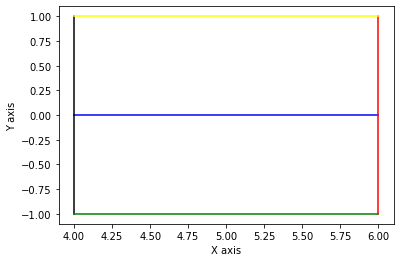

In [22]:
c, d, e, f = get_squareCorners(4, 0, 6, 0)
points = np.array(
[
    [c.x, c.y],
    [d.x, d.y],
    [e.x, e.y],
    [f.x, f.y],
])
print("points are:")
print(points)
plt.plot([4,6], [0,0], color = 'blue')
plt.plot([c.x, d.x], [c.y,d.y], color='red')
plt.plot([e.x, f.x], [e.y,f.y], color = 'black')
plt.plot([c.x, e.x], [c.y,e.y], color='yellow')
plt.plot([d.x, f.x], [d.y,f.y], color = 'green')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

nan nan
horizontal


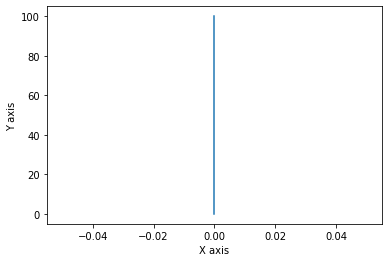

In [30]:
slope,intercept = get_linequation(0, 0, 0, 100)

if(math.isnan(slope)):
    print('horizontal')

plt.plot([0,0], [0,100])
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

In [ ]:
#function to get coordinated of the square which has these 2 points on opposite edges in middle of those edges
#===============================================================
def draw_keypoints(frame, keypoints, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    marker_name= ['nose', 'left eye','right eye', 'left ear', 'right ear', 'left shoulder', 'right shoulder', 'left elbow', 'right elbow', 'left wrist','right wrist', 'left hip', 'right hip', 'left knee', 'right knee', 'left ankle', 'right ankle']
    marker_count=0
    
    for kp in shaped:
        ky, kx, kp_conf = kp
        if kp_conf > confidence_threshold:
            cv2.circle(frame, (int(kx), int(ky)), 4, (0,255,0), -1) 
            # put text on markers
#             cv2.putText(frame, str(str(int(kx)) + ',' + str(int(kx))), (int(kx), int(ky)), cv2.FONT_HERSHEY_PLAIN, 2, (255,255,255),2,cv2.LINE_AA)
            cv2.putText(frame, marker_name[marker_count], (int(kx), int(ky)), cv2.FONT_HERSHEY_PLAIN, 2, (255,255,255),2,cv2.LINE_AA)
#             cv2.putText(frame, str(marker_count), (int(kx), int(ky)), cv2.FONT_HERSHEY_PLAIN, 2, (255,255,255),2,cv2.LINE_AA)
            marker_count=marker_count+1
            if (marker_name[marker_count] == 'left ear'):
                print('left eye: ' + (str(kx) + ',' + str(ky)))
            if (marker_name[marker_count] == 'right ear'):
                print('right eye: ' + (str(kx) + ',' + str(ky)))
            #cv2.putText(image, text, org, font, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])
#============================================================

In [ ]:
def draw_keypoints(frame, keypoints, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    marker_name= ['nose', 'left eye','right eye', 'left ear', 'right ear', 'left shoulder', 'right shoulder', 'left elbow', 'right elbow', 'left wrist','right wrist', 'left hip', 'right hip', 'left knee', 'right knee', 'left ankle', 'right ankle']
    marker_count=0
    
    for kp in shaped:
        ky, kx, kp_conf = kp
        if kp_conf > confidence_threshold:
            cv2.circle(frame, (int(kx), int(ky)), 4, (0,255,0), -1) 
            # put text on markers
#             cv2.putText(frame, str(str(int(kx)) + ',' + str(int(kx))), (int(kx), int(ky)), cv2.FONT_HERSHEY_PLAIN, 2, (255,255,255),2,cv2.LINE_AA)
            cv2.putText(frame, marker_name[marker_count], (int(kx), int(ky)), cv2.FONT_HERSHEY_PLAIN, 2, (255,255,255),2,cv2.LINE_AA)
#             cv2.putText(frame, str(marker_count), (int(kx), int(ky)), cv2.FONT_HERSHEY_PLAIN, 2, (255,255,255),2,cv2.LINE_AA)
            marker_count=marker_count+1
            if (marker_name[marker_count] == 'left ear'):
                print('left eye: ' + (str(kx) + ',' + str(ky)))
            if (marker_name[marker_count] == 'right ear'):
                print('right eye: ' + (str(kx) + ',' + str(ky)))
            #cv2.putText(image, text, org, font, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])
            
EDGES = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}

def draw_connections(frame, keypoints, edges, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for edge, color in edges.items():
        p1, p2 = edge
        y1, x1, c1 = shaped[p1]
        y2, x2, c2 = shaped[p2]
        
        if (c1 > confidence_threshold) & (c2 > confidence_threshold):      
            cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0,0,255), 2)
            
            
            


In [ ]:
headimg = cv2.imread(r'C:\Users\devops\PoseEstimationProject\head.jpg', cv2.IMREAD_COLOR)
headimg= cv2.cvtColor(headimg, cv2.COLOR_BGR2RGB)
print(headimg.shape)
plt.imshow(headimg)

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Reshape image
    img = frame.copy()
    
    #width, height = img.size
    #print(width, height)
    
    img = tf.image.resize_with_pad(np.expand_dims(img, axis=0), 192, 192)
    input_image = tf.cast(img, dtype=tf.float32)
    
    # Setup input and output 
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    # Make predictions 
    interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
    interpreter.invoke()
    keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
    
    #Rendering with background image, using black image
    img = np.zeros((512,512,3), np.uint8)
    
    draw_connections(img, keypoints_with_scores, EDGES, 0.4)
    draw_keypoints(img, keypoints_with_scores, 0.4)
        
    
        
        
    cv2.imshow('MoveNet Lightning', img)
    
#     # Rendering 
#     draw_connections(frame, keypoints_with_scores, EDGES, 0.4)
#     draw_keypoints(frame, keypoints_with_scores, 0.4)
    
#     cv2.imshow('MoveNet Lightning', frame)
        
    
    
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()